In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt 


# Linear Regression

Linear Regression answers the question: how do we find a line that fits the data? 

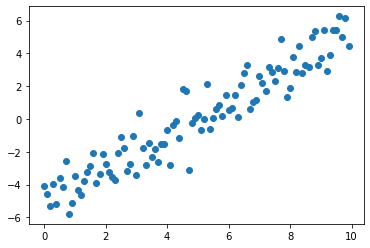

In [2]:
x = torch.arange(0, 10, 0.1)
y = x + torch.randn(100) - 5
plt.scatter(x, y)

Given this chart, we will try to fit the line y = mx + q by finding the PARAMETERS m and q to best fit the data <br> 

Now two questions arise <br>
- How do we assess how well the data is fit?
- How do we find the best parameters? 

Let's explore solutions for evaluating the function --> MSE <br>
Now that we have a function going from dataset and parameters to loss, we can use a calculus tool to optimize it, the derivative

In [3]:
m = 0
q = 0
lr = 1e-4

In [4]:
for i in range(1000):
    predictions = m * x + q
    loss = ((predictions - y)**2).mean()
    
    dm = (2 * (predictions - y) * x).sum()
    dq = (2 * (predictions - y)).sum()

    m -= lr * dm
    q -= lr * dq

    if i % 100 == 0:
        print(loss.item(), m, q)


9.751933097839355 tensor(0.1738) tensor(0.0005)
3.4016737937927246 tensor(0.5586) tensor(-1.9732)
1.8669589757919312 tensor(0.7421) tensor(-3.1810)
1.2994369268417358 tensor(0.8537) tensor(-3.9156)
1.089573860168457 tensor(0.9215) tensor(-4.3622)
1.0119678974151611 tensor(0.9628) tensor(-4.6338)
0.9832698702812195 tensor(0.9878) tensor(-4.7990)
0.9726577997207642 tensor(1.0031) tensor(-4.8995)
0.9687336683273315 tensor(1.0124) tensor(-4.9605)
0.9672825336456299 tensor(1.0180) tensor(-4.9977)


## Logistic Regression
Logistic regression answers the question: How do we find a function that classifies a binary dataset?

C:\Users\lucam\AppData\Local\Temp/ipykernel_6912/3909566606.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(x + torch.randn(100) > 3.5).float()


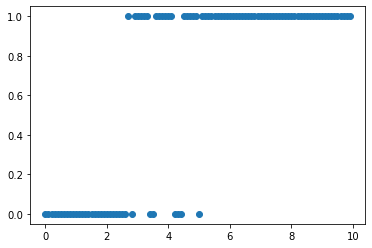

In [15]:
x = torch.arange(0, 10, 0.1)
y = torch.tensor(x + torch.randn(100) > 3.5).float()
plt.scatter(x, y)

Actually, because some datapoints overlap, we have to accept some level of uncertainty in the results. <br> 
So the results won't be binary but a probability of the output being one. <br>
We need a function that can scale any value to [0, 1]. We can start with sigmoid.

In [16]:
# tanh 
tanh = lambda x: (torch.exp(x) - torch.exp(-x)) / (torch.exp(x) + torch.exp(-x))
dtanh = lambda x: 1 - tanh(x)**2
m = torch.zeros(1, requires_grad=True)
q = torch.zeros(1, requires_grad=True)
lr = 1e-1

In [17]:
iterations = 1000

for i in range(iterations):
    predictions = tanh(m * x + q) / 2 + 0.5
    loss = ((predictions - y)**2).mean()
    loss.backward()
    
    with torch.no_grad():
        m -= lr * m.grad
        q -= lr * q.grad
        m.grad = None
        q.grad = None

    if i % 100 == 0:
        print(loss.item(), m, q)


0.25 tensor([0.1848], requires_grad=True) tensor([0.0160], requires_grad=True)
0.08895692229270935 tensor([0.2794], requires_grad=True) tensor([-0.7513], requires_grad=True)
0.07681635767221451 tensor([0.3637], requires_grad=True) tensor([-1.0820], requires_grad=True)
0.07253852486610413 tensor([0.4177], requires_grad=True) tensor([-1.2794], requires_grad=True)
0.0704713761806488 tensor([0.4568], requires_grad=True) tensor([-1.4168], requires_grad=True)
0.0692949891090393 tensor([0.4870], requires_grad=True) tensor([-1.5205], requires_grad=True)
0.06855566799640656 tensor([0.5113], requires_grad=True) tensor([-1.6026], requires_grad=True)
0.06805899739265442 tensor([0.5316], requires_grad=True) tensor([-1.6699], requires_grad=True)
0.06770897656679153 tensor([0.5488], requires_grad=True) tensor([-1.7264], requires_grad=True)
0.06745319813489914 tensor([0.5636], requires_grad=True) tensor([-1.7746], requires_grad=True)


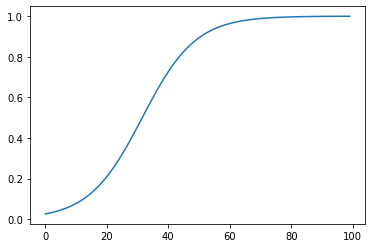

In [18]:
plt.plot(predictions.detach().numpy())